In [1]:
## Packages
library(dplyr)
library(stringr)
library(broom)
library(ggplot2)
library (tidyverse)

Warning message:
“package ‘dplyr’ was built under R version 4.0.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘broom’ was built under R version 4.0.2”
Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.3     ✔ purrr   0.3.4
✔ tidyr   1.1.2     ✔ forcats 0.5.0
✔ readr   1.3.1     

Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
## Read data in, change path as necessary


elections_2016 <- read.csv("2016_election_results_wide.csv")
elections_2016_long <- read.csv("2016_election_results_long.csv")
elections_2018 <- read.csv("2018_election_results_wide.csv")
elections_2018_long <- read.csv("2018_election_results_long.csv")
womenwinning_df <- read.csv("officeholders_race_ethnicity.csv")

In [3]:
states_northeast <- c("Connecticut", "Maine", "Massachusetts",
                      "New Hampshire", "New Jersey", "New York", "Pennsylvania", 
                      "Rhode Island", "Vermont")
states_west <- c("Alaska", "Arizona", "California", "Colorado", "Hawaii", "Idaho", "Nevada", "Montana",
                 "New Mexico", "Oregon", "Utah", "Washington", "Wyoming")
states_midwest <- c("Indiana", "Illinois", "Iowa", "Kansas", "Michigan", "Minnesota", "Missouri", 
                    "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin")
states_south <- c("Alabama", "Arkansas", "Delaware",
                  "Florida", "Georgia", "Kentucky", "Louisiana", "Maryland", "Mississippi", 
                  "North Carolina", "Oklahoma", "South Carolina", "Tennessee", "Texas", 
                  "Virginia", "West Virginia")


# Replace "dataset" with name of your dataset
 elections_2016_region <- elections_2016_long %>%
    mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other"))

elections_2018_region <- elections_2018_long %>%
    mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other"))

head(elections_2016_region)
head (elections_2018_region)

,X,candidate,state,district,year,incumbent,total_votes,vote_prop,gender,winner_party,candidate_party,race_ethnicity,region
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,Scott J. Kawasaki,Alaska,1,2016,True,1,1.00000000,male,Democrat,Democrat,Missing,West
2,2,Truno Holdaway,Alaska,2,2016,False,1153,0.26080072,Unknown,Republican,Democrat,Missing,West
3,3,Christina M. Sinclair,Alaska,3,2016,False,537,0.07565511,female,Republican,Democrat,Missing,West
4,4,David Guttenberg,Alaska,4,2016,True,1,1.00000000,male,Democrat,Democrat,Missing,West
5,5,Adam Wool,Alaska,5,2016,True,3812,0.52973874,male,Democrat,Democrat,Missing,West
6,6,Jason T. Land,Alaska,6,2016,False,2327,0.31222327,male,Republican,Democrat,Missing,West


,X,year,state,district,office,candidate,total_votes,vote_prop,gender,winner_party,candidate_party,race_ethnicity,region
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,2018,Alabama,District 1,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing,South
2,2,2018,Alabama,District 1,State Senator,Caroline Self,15830,0.3232525,female,Republican,Democrat,Missing,South
3,3,2018,Alabama,District 10,State Representative,J.B. King,8565,0.4091235,Unknown,Republican,Democrat,Missing,South
4,4,2018,Alabama,District 10,State Senator,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing,South
5,5,2018,Alabama,District 100,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing,South
6,6,2018,Alabama,District 101,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing,South


`summarise()` ungrouping output (override with `.groups` argument)



gender,count,prop
<chr>,<int>,<dbl>
female,1050,0.3736655
male,1760,0.6263345


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



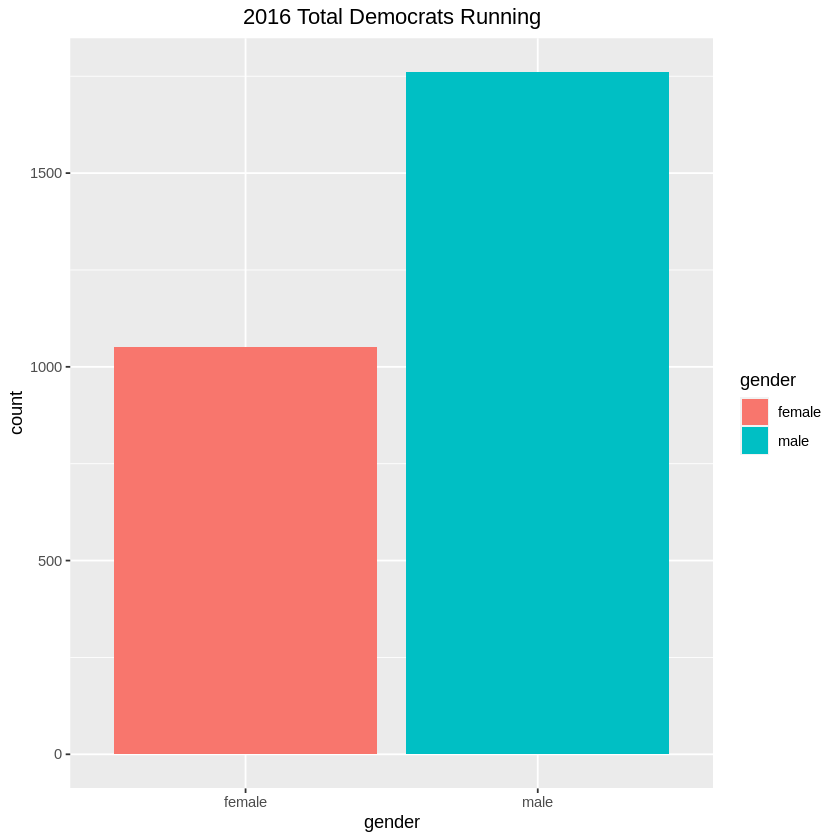

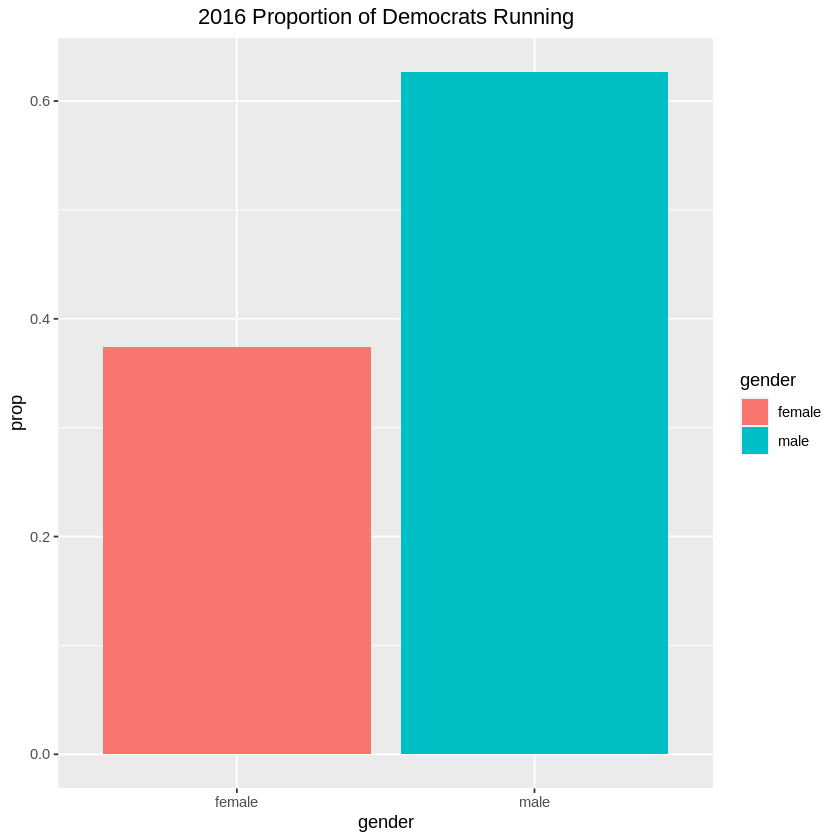

In [4]:

elections_2016_long %>%
    filter(candidate_party == "Democrat", gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (gender) %>%
    summarise (count = n()) %>%
mutate(prop = count/sum(count))

elections_2016_long %>%
    filter(candidate_party == "Democrat", gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (gender) %>%
    summarise (count = n()) %>%
mutate(prop = count/sum(count)) %>%
 ggplot(aes(x = gender, y = count, fill = gender)) +
geom_bar(stat = "identity") +
ggtitle ("2016 Total Democrats Running") + theme(
  plot.title = element_text(hjust = 0.5))

elections_2016_long %>%
    filter(candidate_party == "Democrat", gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (gender) %>%
    summarise (count = n()) %>%
mutate(prop = count/sum(count)) %>%
 ggplot(aes(x = gender, y = prop, fill = gender)) +
geom_bar(stat = "identity") +
ggtitle ("2016 Proportion of Democrats Running") + theme(
  plot.title = element_text(hjust = 0.5))

#Democrats running in 2016, numbers by gender

`summarise()` ungrouping output (override with `.groups` argument)



gender,count,prop
<chr>,<int>,<dbl>
female,605,0.2113906
male,2257,0.7886094


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



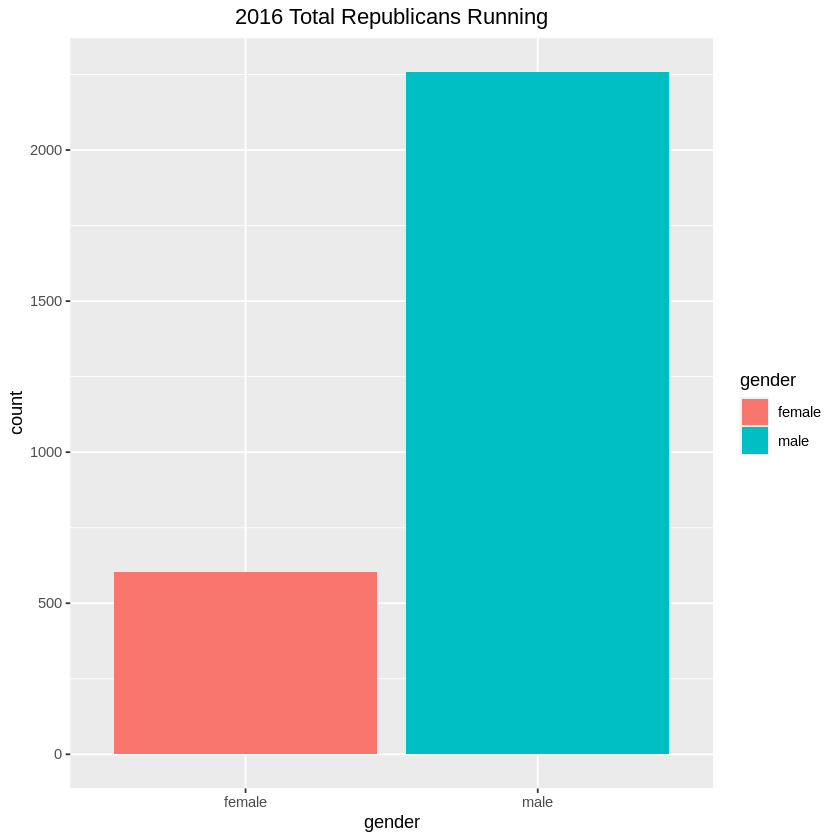

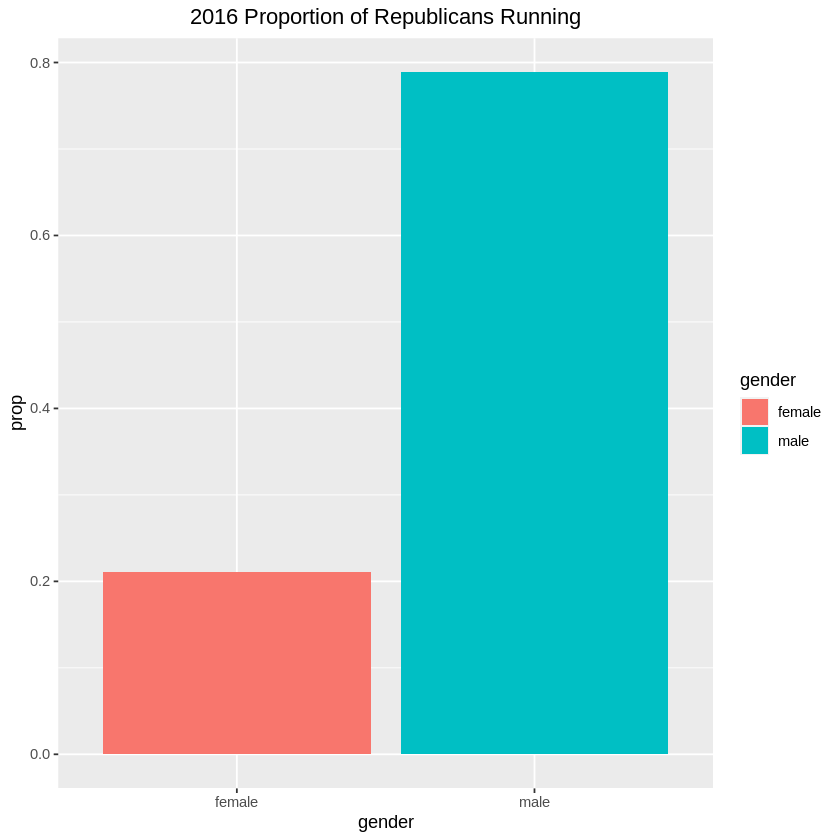

In [5]:

elections_2016_long %>%
    filter(candidate_party == "Republican", gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (gender) %>%
    summarise (count = n()) %>%
mutate(prop = count/sum(count)) 

elections_2016_long %>%
    filter(candidate_party == "Republican", gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (gender) %>%
    summarise (count = n()) %>%
mutate(prop = count/sum(count)) %>%
 ggplot(aes(x = gender, y = count, fill = gender)) +
geom_bar(stat = "identity") +
ggtitle ("2016 Total Republicans Running") + theme(
  plot.title = element_text(hjust = 0.5))

elections_2016_long %>%
    filter(candidate_party == "Republican", gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (gender) %>%
    summarise (count = n()) %>%
mutate(prop = count/sum(count)) %>%
 ggplot(aes(x = gender, y = prop, fill = gender)) +
geom_bar(stat = "identity") +
ggtitle ("2016 Proportion of Republicans Running") + theme(
  plot.title = element_text(hjust = 0.5))


#Republicans running in 2016, numbers by gender

`summarise()` ungrouping output (override with `.groups` argument)



gender,count,prop
<chr>,<int>,<dbl>
female,1655,0.2917842
male,4017,0.7082158


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



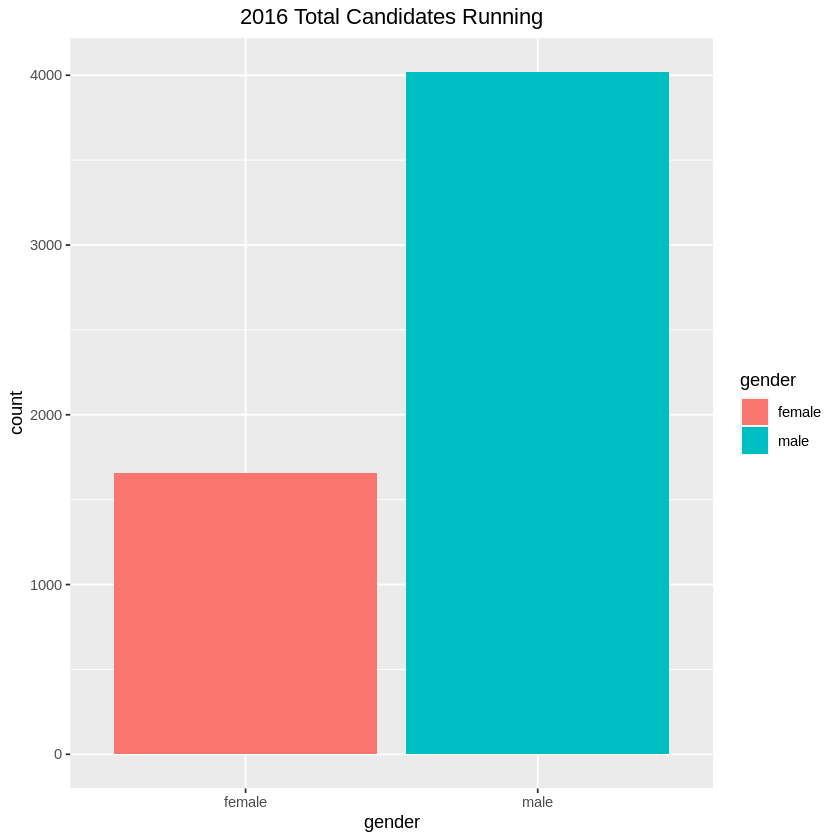

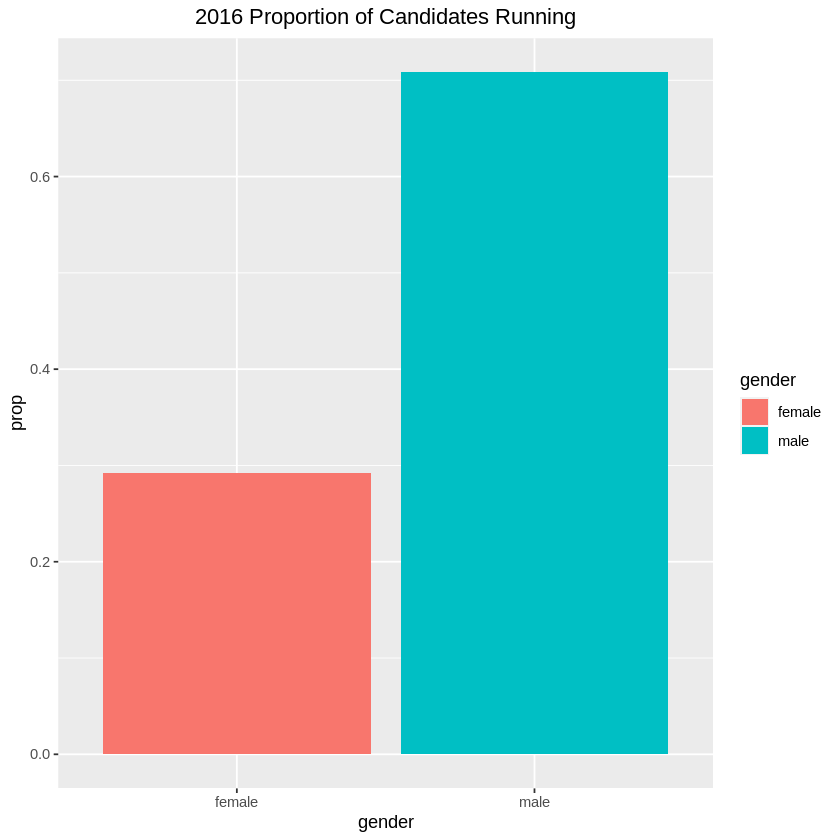

In [40]:
elections_2016_long %>%
    filter(gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (gender) %>%
    summarise (count = n()) %>%
mutate(prop = count/sum(count)) 

elections_2016_long %>%
    filter(gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (gender) %>%
    summarise (count = n()) %>%
mutate(prop = count/sum(count)) %>%
 ggplot(aes(x = gender, y = count, fill = gender)) +
geom_bar(stat = "identity") +
ggtitle ("2016 Total Candidates Running") + theme(
  plot.title = element_text(hjust = 0.5))

elections_2016_long %>%
    filter(gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (gender) %>%
    summarise (count = n()) %>%
mutate(prop = count/sum(count)) %>%
 ggplot(aes(x = gender, y = prop, fill = gender)) +
geom_bar(stat = "identity") +
ggtitle ("2016 Proportion of Candidates Running") + theme(
  plot.title = element_text(hjust = 0.5))

#Overall running in 2016, numbers by gender

`summarise()` ungrouping output (override with `.groups` argument)



gender,count,prop
<chr>,<int>,<dbl>
female,2062,0.4605763
male,2415,0.5394237


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



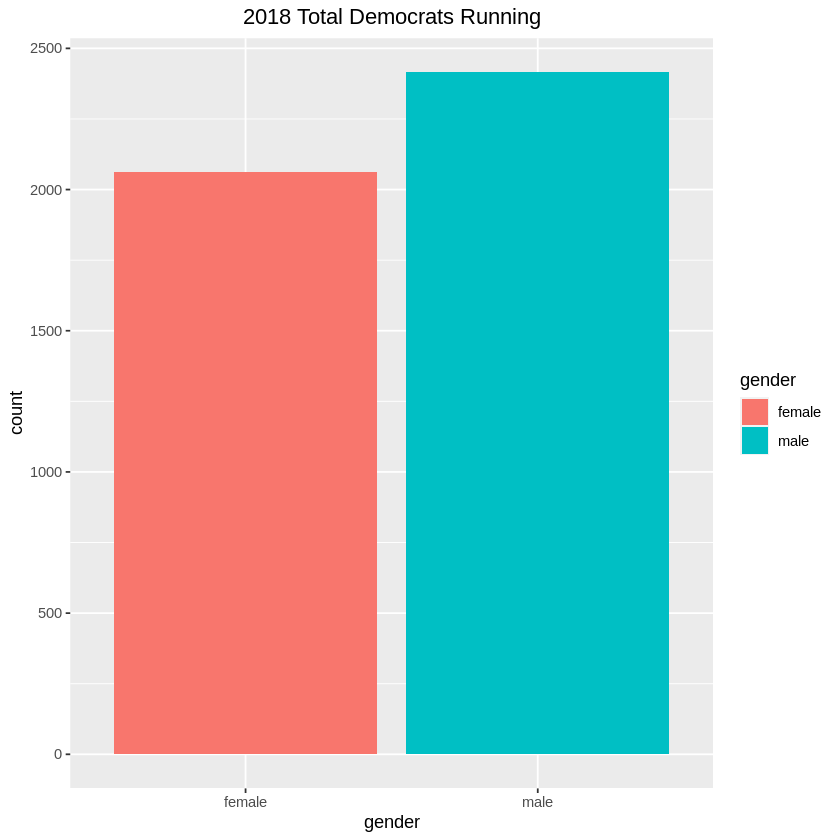

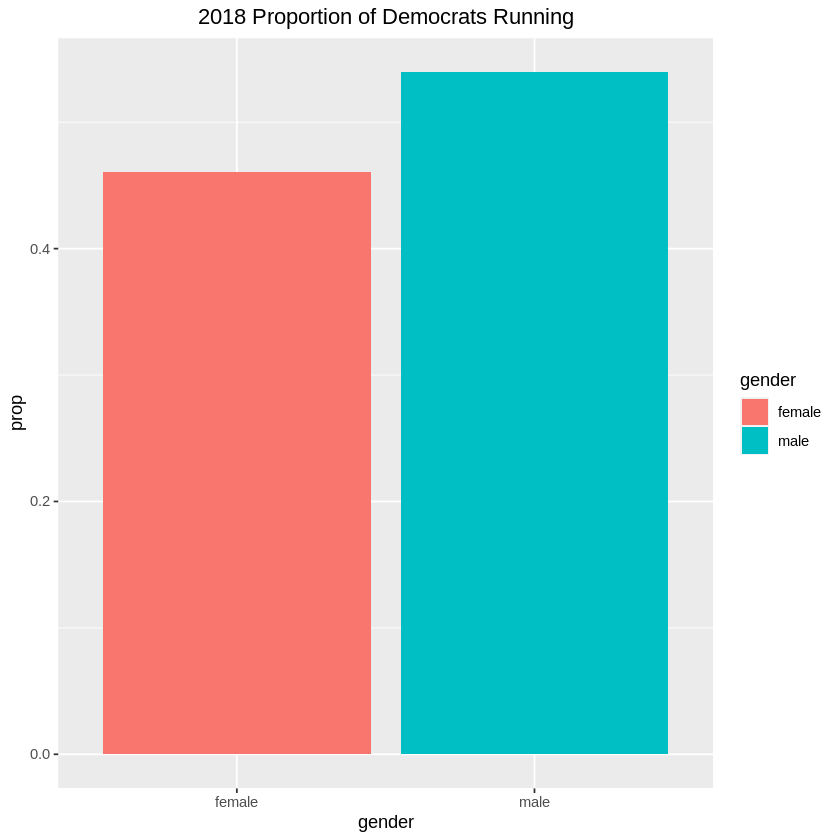

In [41]:
elections_2018_long %>%
    filter(candidate_party == "Democrat", gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (gender) %>%
    summarise (count = n()) %>%
mutate(prop = count/sum(count)) 

elections_2018_long %>%
    filter(candidate_party == "Democrat", gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (gender) %>%
    summarise (count = n()) %>%
mutate(prop = count/sum(count)) %>%
 ggplot(aes(x = gender, y = count, fill = gender)) +
geom_bar(stat = "identity") +
ggtitle ("2018 Total Democrats Running") + theme(
  plot.title = element_text(hjust = 0.5))

elections_2018_long %>%
    filter(candidate_party == "Democrat", gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (gender) %>%
    summarise (count = n()) %>%
mutate(prop = count/sum(count)) %>%
 ggplot(aes(x = gender, y = prop, fill = gender)) +
geom_bar(stat = "identity") +
ggtitle ("2018 Proportion of Democrats Running") + theme(
  plot.title = element_text(hjust = 0.5))

#Democrats running in 2018, numbers by gender

`summarise()` ungrouping output (override with `.groups` argument)



gender,count,prop
<chr>,<int>,<dbl>
female,926,0.2164057
male,3353,0.7835943


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



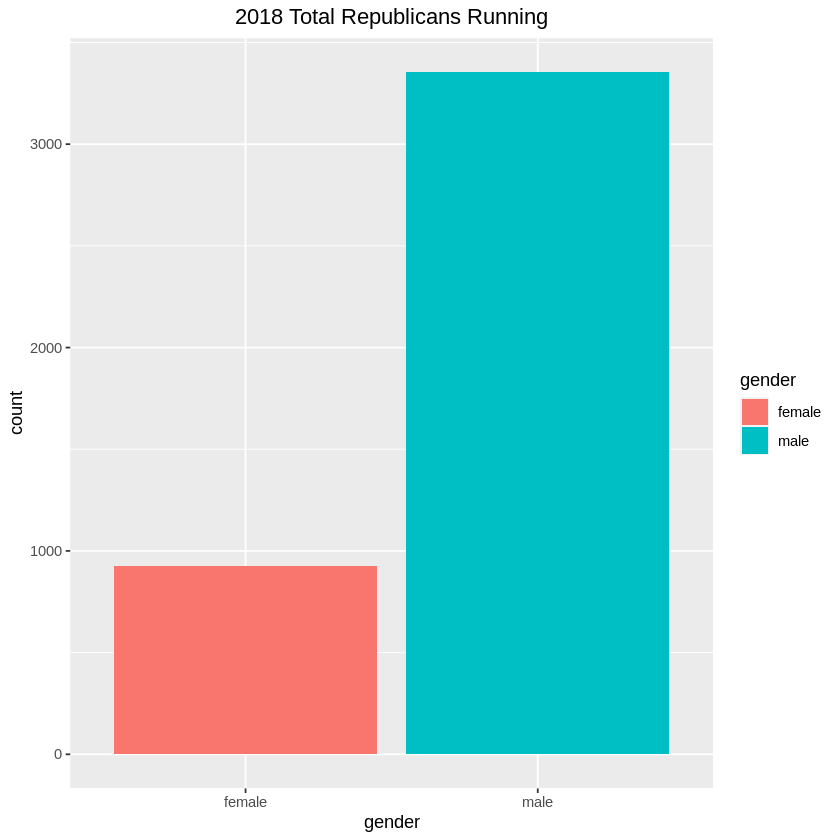

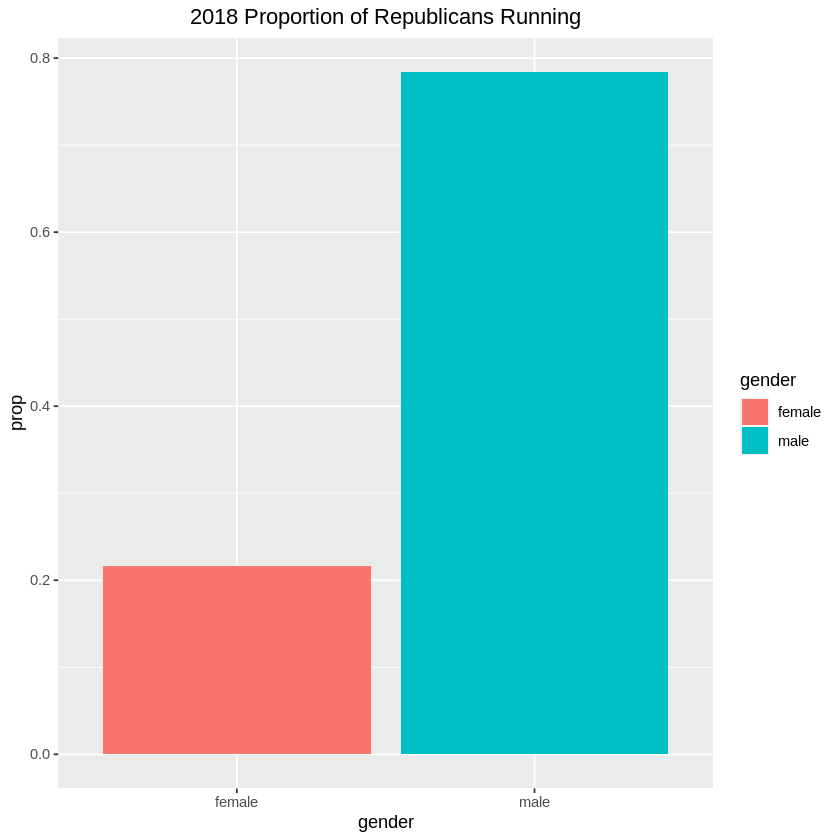

In [42]:
elections_2018_long %>%
    filter(candidate_party == "Republican", gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (gender) %>%
    summarise (count = n()) %>%
mutate(prop = count/sum(count)) 

elections_2018_long %>%
    filter(candidate_party == "Republican", gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (gender) %>%
    summarise (count = n()) %>%
mutate(prop = count/sum(count)) %>%
 ggplot(aes(x = gender, y = count, fill = gender)) +
geom_bar(stat = "identity") +
ggtitle ("2018 Total Republicans Running") + theme(
  plot.title = element_text(hjust = 0.5))

elections_2018_long %>%
    filter(candidate_party == "Republican", gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (gender) %>%
    summarise (count = n()) %>%
mutate(prop = count/sum(count)) %>%
 ggplot(aes(x = gender, y = prop, fill = gender)) +
geom_bar(stat = "identity") +
ggtitle ("2018 Proportion of Republicans Running") + theme(
  plot.title = element_text(hjust = 0.5))

#Republicans running in 2018, numbers by gender

`summarise()` ungrouping output (override with `.groups` argument)



gender,count,prop
<chr>,<int>,<dbl>
female,2988,0.3412517
male,5768,0.6587483


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



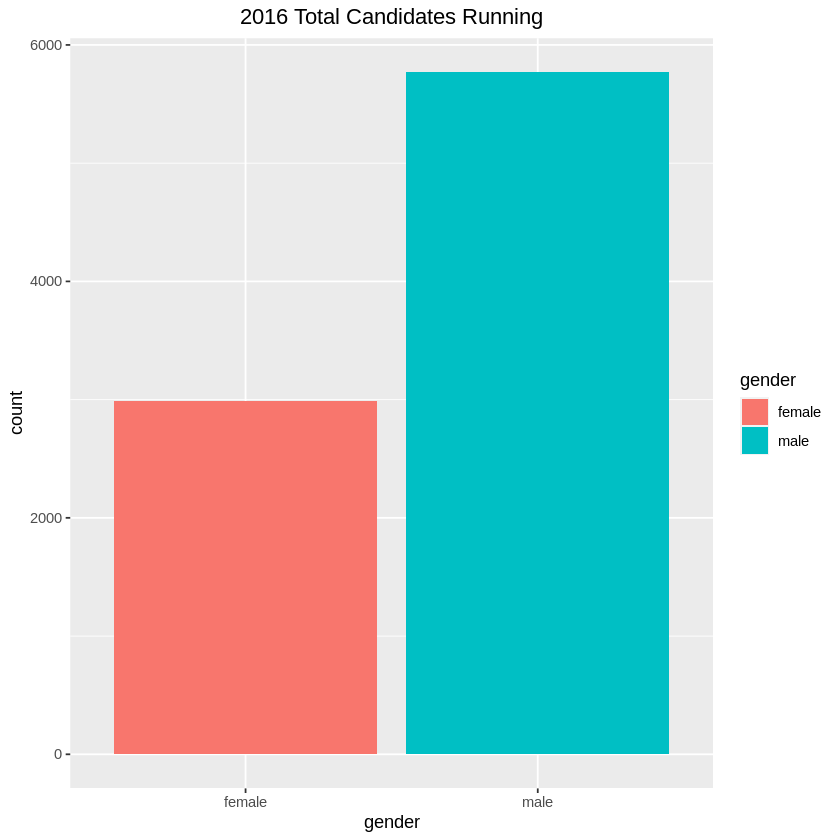

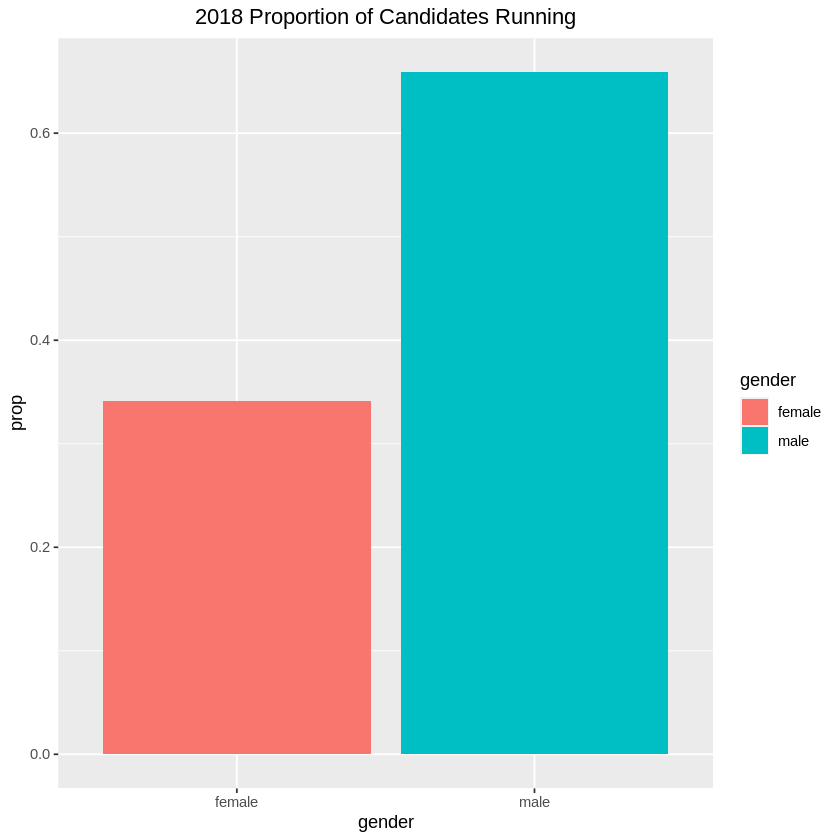

In [43]:
elections_2018_long %>%
    filter(gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (gender) %>%
    summarise (count = n()) %>%
mutate(prop = count/sum(count)) 

elections_2018_long %>%
    filter(gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (gender) %>%
    summarise (count = n()) %>%
mutate(prop = count/sum(count)) %>%
 ggplot(aes(x = gender, y = count, fill = gender)) +
geom_bar(stat = "identity") +
ggtitle ("2016 Total Candidates Running") + theme(
  plot.title = element_text(hjust = 0.5))

elections_2018_long %>%
    filter(gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (gender) %>%
    summarise (count = n()) %>%
mutate(prop = count/sum(count)) %>%
 ggplot(aes(x = gender, y = prop, fill = gender)) +
geom_bar(stat = "identity") +
ggtitle ("2018 Proportion of Candidates Running") + theme(
  plot.title = element_text(hjust = 0.5))

#Overall running in 2018, numbers by gender
#run a hypothesis test/regression on the overall numbers? ?

In [60]:
table_dem <- elections_2016_long %>%
    filter(candidate_party == "Democrat", gender %in% c("female", "male"),!candidate == "No candidate") %>%
    group_by (state, gender) %>%
    summarise(count=n()) %>%
    mutate(gender_prop = (count/sum(count)))
           
           
table_dem[1:50,]
table_dem[51:75,]
           
#2016 proportion of dem candidates by gender and state (32.2 percent of candidates in Alaska were female, etc.)
#did this indexing to see the whole thing---easier way??

`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,gender,count,gender_prop
<chr>,<chr>,<int>,<dbl>
Alaska,female,10,0.3225806
Alaska,male,21,0.6774194
Arkansas,female,11,0.2391304
Arkansas,male,35,0.7608696
California,female,22,0.3055556
California,male,50,0.6944444
Colorado,female,26,0.4482759
Colorado,male,32,0.5517241
Connecticut,female,41,0.3228346


state,gender,count,gender_prop
<chr>,<chr>,<int>,<dbl>
Oklahoma,female,22,0.2820513
Oklahoma,male,56,0.7179487
Oregon,female,21,0.4117647
Oregon,male,30,0.5882353
Pennsylvania,female,40,0.2702703
Pennsylvania,male,108,0.7297297
Rhode Island,female,24,0.3428571
Rhode Island,male,46,0.6571429
South Carolina,female,15,0.2419355


In [93]:
table_rep <- elections_2016_long %>%
    filter(candidate_party == "Republican", gender %in% c("female", "male"),!candidate == "No candidate") %>%
    group_by (state, gender) %>%
    summarise(count=n()) %>%
    mutate(gender_prop = (count/sum(count)))

table_rep[1:50,]
table_rep[51:75,]

#2016 proportion of repub candidates by gender and state

`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,gender,count,gender_prop
<chr>,<chr>,<int>,<dbl>
Alaska,female,13,0.4193548
Alaska,male,18,0.5806452
Arkansas,female,18,0.2337662
Arkansas,male,59,0.7662338
California,female,12,0.1875000
California,male,52,0.8125000
Colorado,female,17,0.2982456
Colorado,male,40,0.7017544
Connecticut,female,29,0.2248062


state,gender,count,gender_prop
<chr>,<chr>,<int>,<dbl>
Oklahoma,female,14,0.15384615
Oklahoma,male,77,0.84615385
Oregon,female,13,0.27659574
Oregon,male,34,0.72340426
Pennsylvania,female,30,0.19867550
Pennsylvania,male,121,0.80132450
Rhode Island,female,6,0.24000000
Rhode Island,male,19,0.76000000
South Carolina,female,7,0.08235294


In [94]:
table_overall <- elections_2016_long %>%
    filter(gender %in% c("female", "male"),!candidate == "No candidate") %>%
    group_by (state, gender) %>%
    summarise(count=n()) %>%
    mutate(gender_prop = (count/sum(count)))

table_overall[1:50,]
table_overall[51:75,]

#2016 proportion of overall candidates by gender and state


`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,gender,count,gender_prop
<chr>,<chr>,<int>,<dbl>
Alaska,female,23,0.3709677
Alaska,male,39,0.6290323
Arkansas,female,29,0.2357724
Arkansas,male,94,0.7642276
California,female,34,0.2500000
California,male,102,0.7500000
Colorado,female,43,0.3739130
Colorado,male,72,0.6260870
Connecticut,female,70,0.2734375


state,gender,count,gender_prop
<chr>,<chr>,<int>,<dbl>
Oklahoma,female,36,0.2130178
Oklahoma,male,133,0.7869822
Oregon,female,34,0.3469388
Oregon,male,64,0.6530612
Pennsylvania,female,70,0.2341137
Pennsylvania,male,229,0.7658863
Rhode Island,female,30,0.3157895
Rhode Island,male,65,0.6842105
South Carolina,female,22,0.1496599


In [49]:
table_dem_2018 <- elections_2018_long %>%
    filter(candidate_party == "Democrat", gender %in% c("female", "male"),!candidate == "No candidate") %>%
    group_by (state, gender) %>%
    summarise(count=n()) %>%
    mutate(gender_prop = (count/sum(count)))
           
           
table_dem_2018[1:50,]
table_dem_2018[51:74,]
table_dem_2018[75:100,]

#doing the same for 2018

`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,gender,count,gender_prop
<chr>,<chr>,<int>,<dbl>
Alabama,female,40,0.4444444
Alabama,male,50,0.5555556
Alaska,female,20,0.4545455
Alaska,male,24,0.5454545
Arizona,female,45,0.5555556
Arizona,male,36,0.4444444
Arkansas,female,12,0.3076923
Arkansas,male,27,0.6923077
California,female,44,0.4000000


state,gender,count,gender_prop
<chr>,<chr>,<int>,<dbl>
New Hampshire,female,192,0.4740741
New Hampshire,male,213,0.5259259
New Mexico,female,29,0.5178571
New Mexico,male,27,0.4821429
New York,female,68,0.3820225
New York,male,110,0.6179775
North Carolina,female,55,0.4621849
North Carolina,male,64,0.5378151
Ohio,female,52,0.4642857


Warning message:
“The `i` argument of ``[.tbl_df`()` must lie in [0, rows] if positive, as of tibble 3.0.0.
Use `NA_integer_` as row index to obtain a row full of `NA` values.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


state,gender,count,gender_prop
<chr>,<chr>,<int>,<dbl>
Texas,female,56,0.5000000
Texas,male,56,0.5000000
Utah,female,35,0.4861111
Utah,male,37,0.5138889
Vermont,female,164,0.5878136
Vermont,male,115,0.4121864
Washington,female,14,0.5185185
Washington,male,13,0.4814815
West Virginia,female,2,0.1250000


In [50]:
table_rep_2018 <- elections_2018_long %>%
    filter(candidate_party == "Republican", gender %in% c("female", "male"),!candidate == "No candidate") %>%
    group_by (state, gender) %>%
    summarise(count=n()) %>%
    mutate(gender_prop = (count/sum(count)))
           
           
table_rep_2018[1:50,]
table_rep_2018[51:74,]
table_rep_2018[75:100,]

`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,gender,count,gender_prop
<chr>,<chr>,<int>,<dbl>
Alabama,female,13,0.1250000
Alabama,male,91,0.8750000
Alaska,female,14,0.3500000
Alaska,male,26,0.6500000
Arizona,female,22,0.3384615
Arizona,male,43,0.6615385
Arkansas,female,10,0.2325581
Arkansas,male,33,0.7674419
California,female,19,0.2676056


state,gender,count,gender_prop
<chr>,<chr>,<int>,<dbl>
Nevada,female,15,0.36585366
Nevada,male,26,0.63414634
New Hampshire,female,74,0.20555556
New Hampshire,male,286,0.79444444
New Mexico,female,14,0.31111111
New Mexico,male,31,0.68888889
New York,female,27,0.19014085
New York,male,115,0.80985915
North Carolina,female,26,0.22413793


state,gender,count,gender_prop
<chr>,<chr>,<int>,<dbl>
South Dakota,female,17,0.18681319
South Dakota,male,74,0.81318681
Tennessee,female,12,0.12631579
Tennessee,male,83,0.87368421
Texas,female,19,0.17592593
Texas,male,89,0.82407407
Utah,female,12,0.13953488
Utah,male,74,0.86046512
Vermont,female,42,0.14736842


In [101]:
table_overall_2018 <- elections_2018_long %>%
    filter(gender %in% c("female", "male"),!candidate == "No candidate") %>%
    group_by (state, gender) %>%
    summarise(count=n()) %>%
    mutate(gender_prop = (count/sum(count)))
           
           
table_overall_2018[1:50,]
table_overall_2018[51:74,]

`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,gender,count,gender_prop
<chr>,<chr>,<int>,<dbl>
Alabama,female,53,0.2731959
Alabama,male,141,0.7268041
Alaska,female,34,0.4047619
Alaska,male,50,0.5952381
Arizona,female,67,0.4589041
Arizona,male,79,0.5410959
Arkansas,female,22,0.2682927
Arkansas,male,60,0.7317073
California,female,63,0.3480663


state,gender,count,gender_prop
<chr>,<chr>,<int>,<dbl>
Nevada,female,46,0.5227273
Nevada,male,42,0.4772727
New Hampshire,female,266,0.3477124
New Hampshire,male,499,0.6522876
New Mexico,female,43,0.4257426
New Mexico,male,58,0.5742574
New York,female,95,0.2968750
New York,male,225,0.7031250
North Carolina,female,81,0.3446809


In [71]:
womenwinning_df <- read.csv("officeholders_race_ethnicity.csv")
head(womenwinning_df)

,id,year,first_name,middle_name,last_name,party,level,position,state,district,race_ethnicity
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,566417k,2017,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
2,566417k,2018,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
3,566417k,2019,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
4,566417k,2020,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
5,14772c,2010,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White
6,14772c,2011,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White


In [10]:
winning_16_18 <- womenwinning_df %>% filter (year==2016 | year ==2018, level == "State Legislative")


winning_16_18 %>% 
    group_by(year) %>%
    summarize (count= n())

#overall women winners 2016 vs 2018


`summarise()` ungrouping output (override with `.groups` argument)



year,count
<int>,<int>
2016,1828
2018,1914


In [78]:
winning_16_18 %>% 
    group_by(year,race_ethnicity) %>%
    summarize (count= n())

#total women winning 2016 vs 2018 by race

`summarise()` regrouping output by 'year' (override with `.groups` argument)



year,race_ethnicity,count
<int>,<chr>,<int>
2016,Asian/Pacific Islander,48
2016,Black/African American,285
2016,Hispanic/Latina,95
2016,Multiracial,1
2016,"Multiracial, Black/African American, Asian/Pacific Islander",2
2016,"Multiracial, Black/African American, Hispanic/Latina",1
2016,"Multiracial, Black/African American, Native American",1
2016,"Multiracial, Hispanic/Latina, Asian/Pacific Islander",1
2016,"Multiracial, Hispanic/Latina, Native American",1


In [102]:
winning_16_18 %>% 
    group_by(year,race_ethnicity) %>%
     summarize (count= n()) %>%
    mutate(race_prop = (count/sum(count)))
   
#proportion of women winning 2016 vs 2018 by race

`summarise()` regrouping output by 'year' (override with `.groups` argument)



year,race_ethnicity,count,race_prop
<int>,<chr>,<int>,<dbl>
2016,Asian/Pacific Islander,48,0.0237859267
2016,Black/African American,285,0.1412289395
2016,Hispanic/Latina,95,0.0470763132
2016,Multiracial,1,0.0004955401
2016,"Multiracial, Black/African American, Asian/Pacific Islander",2,0.0009910803
2016,"Multiracial, Black/African American, Hispanic/Latina",1,0.0004955401
2016,"Multiracial, Black/African American, Native American",1,0.0004955401
2016,"Multiracial, Hispanic/Latina, Asian/Pacific Islander",1,0.0004955401
2016,"Multiracial, Hispanic/Latina, Native American",1,0.0004955401


In [89]:
winning_16_18 <- womenwinning_df %>% filter (year==2016 | year ==2018)


win_by_state <- winning_16_18 %>% 
    group_by(year,state) %>%
    summarize (count= n())

win_by_state[1:50,]
win_by_state[51:80,]
win_by_state[81:112,]


#overall women winners 2016 vs 2018, split by state


`summarise()` regrouping output by 'year' (override with `.groups` argument)



year,state,count
<int>,<chr>,<int>
2016,Alabama - AL,24
2016,Alaska - AK,18
2016,American Samoa - AM,1
2016,Arizona - AZ,38
2016,Arkansas - AR,29
2016,California - CA,55
2016,Colorado - CO,45
2016,Connecticut - CT,58
2016,Delaware - DE,17


year,state,count
<int>,<chr>,<int>
2016,Virginia - VA,28
2016,Washington - WA,55
2016,West Virginia - WV,23
2016,Wisconsin - WI,37
2016,Wyoming - WY,15
2018,Alabama - AL,25
2018,Alaska - AK,21
2018,American Samoa - AM,4
2018,Arizona - AZ,43


year,state,count
<int>,<chr>,<int>
2018,Minnesota - MN,72
2018,Mississippi - MS,29
2018,Missouri - MO,52
2018,Montana - MT,44
2018,Nebraska - NE,14
2018,Nevada - NV,30
2018,New Hampshire - NH,131
2018,New Jersey - NJ,41
2018,New Mexico - NM,37


In [108]:
win_by_state_race<-winning_16_18 %>% 
    group_by(year,state,race_ethnicity) %>%
    summarize (count= n())

win_by_state_race[1:50,]
win_by_state_race[51:100,]
win_by_state_race[101:151,]
win_by_state_race[152:203,]
win_by_state_race[204:255,]
win_by_state_race[256:305,]
win_by_state_race[306:350,]


#total women winning 2016 vs 2018 by state and race

`summarise()` regrouping output by 'year', 'state' (override with `.groups` argument)



year,state,race_ethnicity,count
<int>,<chr>,<chr>,<int>
2016,Alabama - AL,Black/African American,13
2016,Alabama - AL,White,11
2016,Alaska - AK,Hispanic/Latina,1
2016,Alaska - AK,Native American,1
2016,Alaska - AK,White,16
2016,American Samoa - AM,Asian/Pacific Islander,1
2016,Arizona - AZ,Asian/Pacific Islander,1
2016,Arizona - AZ,Hispanic/Latina,5
2016,Arizona - AZ,"Multiracial, Hispanic/Latina, Native American",1


year,state,race_ethnicity,count
<int>,<chr>,<chr>,<int>
2016,Iowa - IA,White,33
2016,Kansas - KS,Black/African American,4
2016,Kansas - KS,Native American,1
2016,Kansas - KS,White,36
2016,Kentucky - KY,Black/African American,1
2016,Kentucky - KY,White,24
2016,Louisiana - LA,Black/African American,9
2016,Louisiana - LA,White,14
2016,Maine - ME,"Multiracial, White/Caucasian, Asian/Pacific Islander",1


year,state,race_ethnicity,count
<int>,<chr>,<chr>,<int>
2016,New York - NY,Asian/Pacific Islander,1
2016,New York - NY,Black/African American,20
2016,New York - NY,Hispanic/Latina,5
2016,New York - NY,"Multiracial, White/Caucasian, Hispanic/Latina",1
2016,New York - NY,White,39
2016,North Carolina - NC,Black/African American,13
2016,North Carolina - NC,White,34
2016,North Dakota - ND,White,31
2016,Ohio - OH,Black/African American,10


year,state,race_ethnicity,count
<int>,<chr>,<chr>,<int>
2016,Washington - WA,White,49
2016,West Virginia - WV,Black/African American,1
2016,West Virginia - WV,White,22
2016,Wisconsin - WI,Black/African American,4
2016,Wisconsin - WI,Hispanic/Latina,2
2016,Wisconsin - WI,White,31
2016,Wyoming - WY,White,15
2018,Alabama - AL,Black/African American,14
2018,Alabama - AL,White,11


year,state,race_ethnicity,count
<int>,<chr>,<chr>,<int>
2018,Illinois - IL,Asian/Pacific Islander,2
2018,Illinois - IL,Black/African American,15
2018,Illinois - IL,Hispanic/Latina,9
2018,Illinois - IL,Multiracial,1
2018,Illinois - IL,White,46
2018,Indiana - IN,Black/African American,4
2018,Indiana - IN,Hispanic/Latina,1
2018,Indiana - IN,White,32
2018,Iowa - IA,Black/African American,3


year,state,race_ethnicity,count
<int>,<chr>,<chr>,<int>
2018,New Hampshire - NH,Black/African American,2
2018,New Hampshire - NH,Hispanic/Latina,1
2018,New Hampshire - NH,White,127
2018,New Jersey - NJ,Black/African American,13
2018,New Jersey - NJ,Hispanic/Latina,9
2018,New Jersey - NJ,White,19
2018,New Mexico - NM,Black/African American,2
2018,New Mexico - NM,Hispanic/Latina,14
2018,New Mexico - NM,Native American,3


year,state,race_ethnicity,count
<int>,<chr>,<chr>,<int>
2018,Utah - UT,Asian/Pacific Islander,2
2018,Utah - UT,Black/African American,2
2018,Utah - UT,Hispanic/Latina,3
2018,Utah - UT,White,16
2018,Vermont - VT,Black/African American,1
2018,Vermont - VT,"Multiracial, White/Caucasian, Hispanic/Latina",1
2018,Vermont - VT,"Multiracial, White/Caucasian, Middle Eastern/North African",1
2018,Vermont - VT,White,70
2018,Virgin Islands - VI,Black/African American,3


In [111]:
state_race_prop<-winning_16_18 %>% 
    group_by(year,state, race_ethnicity) %>%
     group_by (race_ethnicity, .add = TRUE) %>%
     summarize (count= n()) %>%
    mutate(race_prop = (count/sum(count)))

state_race_prop[1:50,]
state_race_prop[51:100,]
state_race_prop[101:152,]
state_race_prop[153:204,]
state_race_prop[205:256,]
state_race_prop[257:308,]
state_race_prop[309:350,]


   


#proportion of women winning 2016 vs 2018 by state and race

`summarise()` regrouping output by 'year', 'state' (override with `.groups` argument)



year,state,race_ethnicity,count,race_prop
<int>,<chr>,<chr>,<int>,<dbl>
2016,Alabama - AL,Black/African American,13,0.54166667
2016,Alabama - AL,White,11,0.45833333
2016,Alaska - AK,Hispanic/Latina,1,0.05555556
2016,Alaska - AK,Native American,1,0.05555556
2016,Alaska - AK,White,16,0.88888889
2016,American Samoa - AM,Asian/Pacific Islander,1,1.00000000
2016,Arizona - AZ,Asian/Pacific Islander,1,0.02631579
2016,Arizona - AZ,Hispanic/Latina,5,0.13157895
2016,Arizona - AZ,"Multiracial, Hispanic/Latina, Native American",1,0.02631579


year,state,race_ethnicity,count,race_prop
<int>,<chr>,<chr>,<int>,<dbl>
2016,Iowa - IA,White,33,0.891891892
2016,Kansas - KS,Black/African American,4,0.097560976
2016,Kansas - KS,Native American,1,0.024390244
2016,Kansas - KS,White,36,0.878048780
2016,Kentucky - KY,Black/African American,1,0.040000000
2016,Kentucky - KY,White,24,0.960000000
2016,Louisiana - LA,Black/African American,9,0.391304348
2016,Louisiana - LA,White,14,0.608695652
2016,Maine - ME,"Multiracial, White/Caucasian, Asian/Pacific Islander",1,0.017857143


year,state,race_ethnicity,count,race_prop
<int>,<chr>,<chr>,<int>,<dbl>
2016,New York - NY,Asian/Pacific Islander,1,0.01515152
2016,New York - NY,Black/African American,20,0.30303030
2016,New York - NY,Hispanic/Latina,5,0.07575758
2016,New York - NY,"Multiracial, White/Caucasian, Hispanic/Latina",1,0.01515152
2016,New York - NY,White,39,0.59090909
2016,North Carolina - NC,Black/African American,13,0.27659574
2016,North Carolina - NC,White,34,0.72340426
2016,North Dakota - ND,White,31,1.00000000
2016,Ohio - OH,Black/African American,10,0.27027027


year,state,race_ethnicity,count,race_prop
<int>,<chr>,<chr>,<int>,<dbl>
2016,West Virginia - WV,Black/African American,1,0.04347826
2016,West Virginia - WV,White,22,0.95652174
2016,Wisconsin - WI,Black/African American,4,0.10810811
2016,Wisconsin - WI,Hispanic/Latina,2,0.05405405
2016,Wisconsin - WI,White,31,0.83783784
2016,Wyoming - WY,White,15,1.00000000
2018,Alabama - AL,Black/African American,14,0.56000000
2018,Alabama - AL,White,11,0.44000000
2018,Alaska - AK,Native American,3,0.14285714


year,state,race_ethnicity,count,race_prop
<int>,<chr>,<chr>,<int>,<dbl>
2018,Illinois - IL,Black/African American,15,0.205479452
2018,Illinois - IL,Hispanic/Latina,9,0.123287671
2018,Illinois - IL,Multiracial,1,0.013698630
2018,Illinois - IL,White,46,0.630136986
2018,Indiana - IN,Black/African American,4,0.108108108
2018,Indiana - IN,Hispanic/Latina,1,0.027027027
2018,Indiana - IN,White,32,0.864864865
2018,Iowa - IA,Black/African American,3,0.078947368
2018,Iowa - IA,White,35,0.921052632


year,state,race_ethnicity,count,race_prop
<int>,<chr>,<chr>,<int>,<dbl>
2018,New Hampshire - NH,Hispanic/Latina,1,0.007633588
2018,New Hampshire - NH,White,127,0.969465649
2018,New Jersey - NJ,Black/African American,13,0.317073171
2018,New Jersey - NJ,Hispanic/Latina,9,0.219512195
2018,New Jersey - NJ,White,19,0.463414634
2018,New Mexico - NM,Black/African American,2,0.054054054
2018,New Mexico - NM,Hispanic/Latina,14,0.378378378
2018,New Mexico - NM,Native American,3,0.081081081
2018,New Mexico - NM,Other,1,0.027027027


year,state,race_ethnicity,count,race_prop
<int>,<chr>,<chr>,<int>,<dbl>
2018,Utah - UT,White,16,0.69565217
2018,Vermont - VT,Black/African American,1,0.01369863
2018,Vermont - VT,"Multiracial, White/Caucasian, Hispanic/Latina",1,0.01369863
2018,Vermont - VT,"Multiracial, White/Caucasian, Middle Eastern/North African",1,0.01369863
2018,Vermont - VT,White,70,0.95890411
2018,Virgin Islands - VI,Black/African American,3,0.60000000
2018,Virgin Islands - VI,Hispanic/Latina,2,0.40000000
2018,Virginia - VA,Asian/Pacific Islander,1,0.02564103
2018,Virginia - VA,Black/African American,11,0.28205128


In [62]:
table_2016_dem <- elections_2016_region %>%
    filter(candidate_party == "Democrat", gender %in% c("female", "male"),!candidate == "No candidate") %>%
    group_by (region, gender) %>%
    summarise(count=n()) %>%
    mutate(gender_prop = (count/sum(count)))
           
           
table_2016_dem[1:8,]


`summarise()` regrouping output by 'region' (override with `.groups` argument)



region,gender,count,gender_prop
<chr>,<chr>,<int>,<dbl>
Midwest,female,342,0.4081146
Midwest,male,496,0.5918854
Northeast,female,200,0.3215434
Northeast,male,422,0.6784566
South,female,236,0.3395683
South,male,459,0.6604317
West,female,272,0.4152672
West,male,383,0.5847328


In [58]:
table_2018_dem <- elections_2018_region %>%
    filter(candidate_party == "Democrat", gender %in% c("female", "male"),!candidate == "No candidate") %>%
    group_by (region, gender) %>%
    summarise(count=n()) %>%
    mutate(gender_prop = (count/sum(count)))
           
           
table_2018_dem[1:8,]

`summarise()` regrouping output by 'region' (override with `.groups` argument)



region,gender,count,gender_prop
<chr>,<chr>,<int>,<dbl>
Midwest,female,441,0.4486267
Midwest,male,542,0.5513733
Northeast,female,763,0.4504132
Northeast,male,931,0.5495868
South,female,477,0.4599807
South,male,560,0.5400193
West,female,381,0.4993447
West,male,382,0.5006553


In [59]:
table_2016_rep <- elections_2016_region %>%
    filter(candidate_party == "Republican", gender %in% c("female", "male"),!candidate == "No candidate") %>%
    group_by (region, gender) %>%
    summarise(count=n()) %>%
    mutate(gender_prop = (count/sum(count)))
           
           
table_2016_rep[1:8,]


table_2018_rep <- elections_2018_region %>%
    filter(candidate_party == "Republican", gender %in% c("female", "male"),!candidate == "No candidate") %>%
    group_by (region, gender) %>%
    summarise(count=n()) %>%
    mutate(gender_prop = (count/sum(count)))
           
           
table_2018_rep[1:8,]

`summarise()` regrouping output by 'region' (override with `.groups` argument)



region,gender,count,gender_prop
<chr>,<chr>,<int>,<dbl>
Midwest,female,187,0.2154378
Midwest,male,681,0.7845622
Northeast,female,111,0.2274590
Northeast,male,377,0.7725410
South,female,146,0.1709602
South,male,708,0.8290398
West,female,161,0.2469325
West,male,491,0.7530675


`summarise()` regrouping output by 'region' (override with `.groups` argument)



region,gender,count,gender_prop
<chr>,<chr>,<int>,<dbl>
Midwest,female,250,0.2281022
Midwest,male,846,0.7718978
Northeast,female,300,0.2147459
Northeast,male,1097,0.7852541
South,female,190,0.1774043
South,male,881,0.8225957
West,female,186,0.2601399
West,male,529,0.7398601


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` regrouping output by 'candidate_party' (override with `.groups` argument)

`summarise()` regrouping output by 'candidate_party' (override with `.groups` argument)



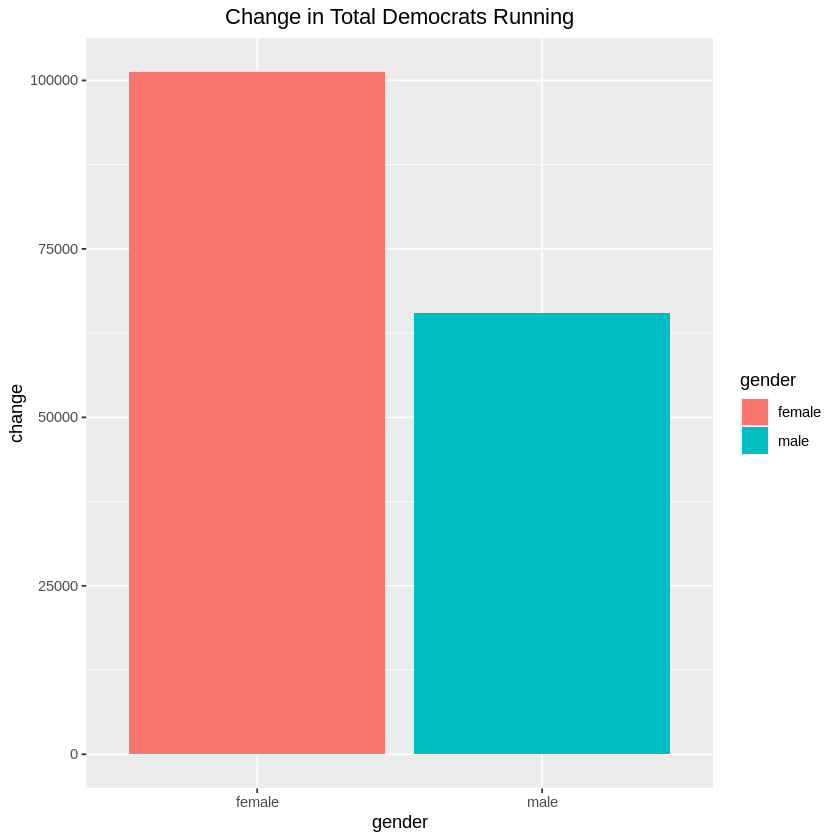

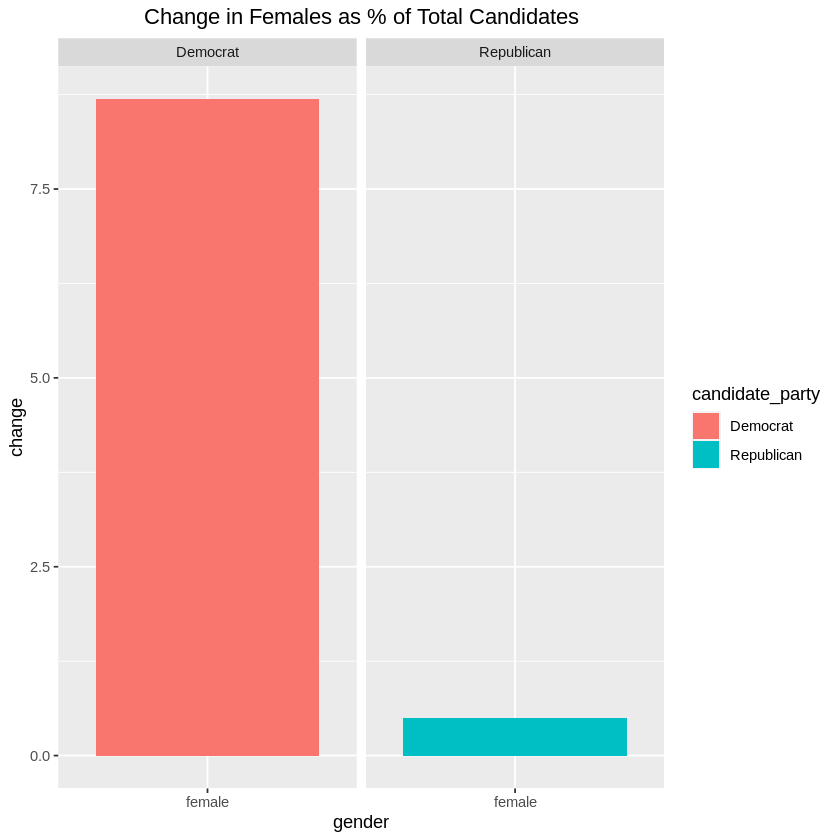

In [31]:

#change in Dems, raw total, 2018 - 2016
dem_16 <- elections_2016_long %>%
    filter(candidate_party == "Democrat", gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (gender) %>%
    summarise (count_16 = n()) 

dem_18 <- elections_2018_long %>%
    filter(candidate_party == "Democrat", gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (gender) %>%
    summarise (count_18 = n()) 


dem_18  %>%
    left_join(dem_16, by = "gender") %>%
    mutate(change = 100*(count_18 - count_16)) %>%
 ggplot(aes(x = gender, y = change, fill = gender)) +
geom_bar(stat = "identity") +
ggtitle ("Change in Total Democrats Running") + theme(
  plot.title = element_text(hjust = 0.5))



#change in females as % of total by party, 2018 - 2016
prop_16 <- elections_2016_long %>%
    filter(candidate_party %in% c("Republican", "Democrat"), gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (candidate_party, gender) %>%
    summarise (count = n()) %>%
mutate(prop_16 = count/sum(count)) 

prop_18 <- elections_2018_long %>%
    filter(candidate_party %in% c("Republican", "Democrat"), gender %in% c("male", "female"),!candidate == "No candidate") %>%
    group_by (candidate_party, gender) %>%
    summarise (count = n()) %>%
mutate(prop_18 = count/sum(count)) 

prop_16  %>%
    left_join(prop_18, by = c("candidate_party", "gender")) %>%
    filter(gender == "female") %>%
    mutate(change = 100*(prop_18 - prop_16)) %>%
 ggplot(aes(x = gender, y = change, fill = candidate_party)) +
geom_bar(stat = "identity") +
facet_grid(. ~ candidate_party) +
ggtitle ("Change in Females as % of Total Candidates") + theme(
  plot.title = element_text(hjust = 0.5))


